# ENEL645 Project - Driver drowsiness detection
### Group 6


### Import Libraries

In [1]:
import cv2 #import open-cv
import pandas as pd #import pandas
import numpy as np #import numpy
import matplotlib.pyplot as plt #import numpy matplotlib

Read the images in the dataset

In [2]:
img_array = cv2.imread('train/Closed_Eyes/s0001_00001_0_0_0_0_0_01.png', cv2.IMREAD_GRAYSCALE)

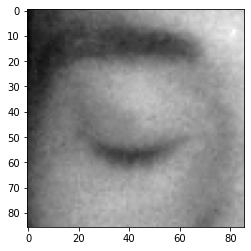

In [3]:
plt.imshow(img_array, cmap="gray")

In [4]:
img_array.shape #shape of input image

(86, 86)

In [5]:
import os

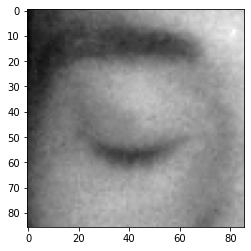

In [6]:
Datadirectory = 'train'
Classes = ['Closed_Eyes', 'Open_Eyes']
# Datadirectory = 'dataset_new/train/'
# Classes = ['Closed', 'Open']
for category in Classes:
  path = os.path.join(Datadirectory, category)
  for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
    backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
    plt.imshow(img_array, cmap="gray")
    plt.show()
    break
  break

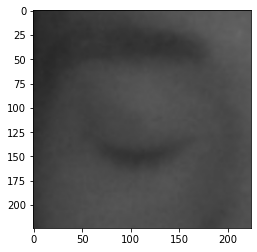

In [7]:
img_size = 224
new_array = cv2.resize(backtorgb, (img_size,img_size))
plt.imshow(new_array, cmap="gray")
plt.show()

In [8]:
#reading all the image and converting them into an array of data and labels
training_data = []

def create_training_data():
  for category in Classes:
      path = os.path.join(Datadirectory, category)
      class_num = Classes.index(category)
      for img in os.listdir(path):
        try :
           img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
           backtorgb = cv2.cvtColor(img_array,cv2.COLOR_GRAY2RGB)
           new_array = cv2.resize(backtorgb, (img_size,img_size))
           training_data.append([new_array, class_num])#class number is the index e.g 0, 1
        except Exception as e:
          pass
   

In [9]:
create_training_data()

In [10]:
print(len(training_data))

4000


In [11]:
import random
random.shuffle(training_data)

In [12]:
#here we reshape the image.
X = []
y = []
for features, label in training_data:
  X.append(features)
  y.append(label)

X = np.array(X).reshape(-1, img_size, img_size, 3) #Converting label into numpy array

In [13]:
X.shape #Display shape of input data

(4000, 224, 224, 3)

In [14]:
X = X/255.0 #normalize the data

In [15]:
Y = np.array(y)#Converting label into numpy array

# Deeplearning model for training -
### We use transfer Learning

In [16]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Download Mobilenet Model

Since we are using transfer learning to help us attain a more accurate result, we then download the pre-trained mobilenet model.

mobile net is alo light weight with less number of parameter to train.

In [17]:
model = tf.keras.applications.mobilenet.MobileNet()

In [18]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32

In [19]:
base_input = model.layers[0].input  ##input

In [20]:
base_output = model.layers[-4].output

In [21]:
Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer)
final_output = layers.Activation('sigmoid')(final_output) #We use sigmoid because it is a binary classification

In [22]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [ ]:
#for layers in model.layers
#layers.trainable = false #If you want to freeze part of the layer the use this
#Our problem is similar as it a a classification problem, we dont need to freeze it

In [23]:
new_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

In [24]:
new_model.compile(loss="binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

# Define Callbacks

In [25]:
model_name = "DrowsinessDet_weights.h5"
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 20)

monitor = tf.keras.callbacks.ModelCheckpoint(model_name, monitor='val_loss',\
                                             verbose=0,save_best_only=True,\
                                             save_weights_only=True,\
                                             mode='min')
# Learning rate schedule
def scheduler(epoch, lr):
    if epoch%4 == 0 and epoch!= 0:
        lr = lr/2
    return lr

lr_schedule = tf.keras.callbacks.LearningRateScheduler(scheduler,verbose = 0)

In [26]:
new_model.fit(X,Y, epochs = 10, validation_split = 0.1)
#Note: Increase the number of epoch to get more appropriate result, accuracy.
new_model.save('DrowsinessDet_weights.h5')# save model #if you plan to train the model again, give it you weight name.  

Epoch 1/10
113/113 [==============================] - 812s 7s/step - loss: 0.0491 - accuracy: 0.9751 - val_loss: 0.5030 - val_accuracy: 0.7050
Epoch 2/10
113/113 [==============================] - 805s 7s/step - loss: 0.0018 - accuracy: 0.9991 - val_loss: 0.1764 - val_accuracy: 0.9375
Epoch 3/10
113/113 [==============================] - 789s 7s/step - loss: 0.0013 - accuracy: 0.9995 - val_loss: 4.6304 - val_accuracy: 0.7050
Epoch 4/10
113/113 [==============================] - 821s 7s/step - loss: 0.0197 - accuracy: 0.9951 - val_loss: 0.0570 - val_accuracy: 0.9825
Epoch 5/10
113/113 [==============================] - 811s 7s/step - loss: 0.0018 - accuracy: 0.9995 - val_loss: 1.2518e-05 - val_accuracy: 1.0000
Epoch 6/10
113/113 [==============================] - 802s 7s/step - loss: 7.6455e-05 - accuracy: 1.0000 - val_loss: 8.8940e-06 - val_accuracy: 1.0000
Epoch 7/10
113/113 [==============================] - 804s 7s/step - loss: 4.8045e-05 - accuracy: 1.0000 - val_loss: 1.0523e-05 - 

In [36]:
new_model = tf.keras.models.load_model('DrowsinessDet_weights.h5') # Load model

# Test whether the eye is closed or open

As the value ranges from 0 to 1, we the eye is detected as closed, then  the value will be nearer to zero. 
And if the eye is detected as open then it will be near to 1.

In [37]:
img_array = cv2.imread('train/Open_Eyes/s0037_08567_1_0_1_0_0_01.png',cv2.IMREAD_GRAYSCALE)
backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2BGR)
new_array = cv2.resize(backtorgb, (img_size, img_size))

In [38]:
X_input = np.array(new_array).reshape(1, img_size, img_size, 3) #Load test image into array and resize

In [39]:
X_input.shape #shape of test image

(1, 224, 224, 3)

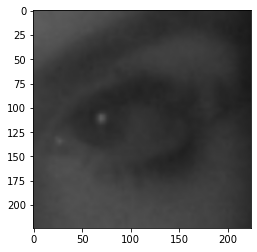

In [40]:
plt.imshow(new_array)

In [41]:
X_input = X_input/255.0

In [42]:
prediction = new_model.predict(X_input) #pass X_input to prediction

In [43]:
prediction #Very positive value prove open eyes, value tending to zero proves closed eyes

array([[0.99994224]], dtype=float32)

If the eye is closed, the prediction value will be closer to 0, i.e. 0.0000000008970.
If the eye is closed, the prediction value will be closer to 1 and above 1 , i.e. 1.00123

#Test on random face online

In [44]:
img = cv2.imread('000613.jpg')

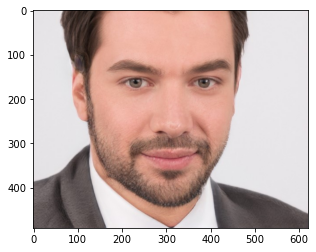

In [45]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [46]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt.xml')
eyeCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')   #haarcascade_eye.xml'

In [47]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [48]:
eyes = eyeCascade.detectMultiScale(gray, 1.1, 4)

In [49]:
for (x, y, w, h) in eyes:
  cv2.rectangle(img, (x,y), (x+w, y+h), (0, 255, 0), 1)

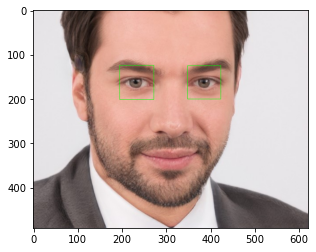

In [50]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))


In [51]:
eyeCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
eyes = eyeCascade.detectMultiScale(gray, 1.1, 4)
for x, y,w, h in eyes:
  roi_gray = gray[y:y+h, x:x+w]
  roi_color = img[y:y+h, x:x+w]
  eyess = eyeCascade.detectMultiScale(roi_gray)
  if len(eyess) == 0:
    print("eyes not detected")
  else:
    for ex, ey, ew, eh in eyess :
      eyes_roi = roi_color[ey:ey+eh, ex:ex+ew]

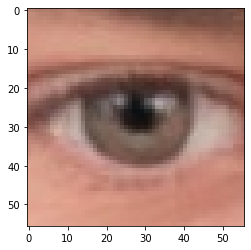

In [52]:
plt.imshow(cv2.cvtColor(eyes_roi, cv2.COLOR_BGR2RGB))

In [53]:
eyes_roi.shape

(56, 56, 3)

In [54]:
final_img = cv2.resize(eyes_roi, (224,224))
final_img = np.expand_dims(final_img, axis=0)
final_img = final_img/255.0

In [55]:
new_model.predict(final_img)

array([[0.9999988]], dtype=float32)

Since the eye is open, we got the prediction value as 1.

# Realtime Video Demo
## First Detect that eyes are closed on open

In [56]:
import cv2
path = 'haarcascade_frontalface_default.xml'
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt.xml')

cap = cv2.VideoCapture(1)
#Check if the webcam is opened correctly

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")

while True:
    ret, frame = cap.read()
    eye_cascade= cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    gray =cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    #print(faceCascade.empty())
    eyes = eye_cascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in eyes:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0,255,0), 2)
        eyess = eye_cascade.detectMultiScale(roi_gray)
        if len(eyess) == 0:
            print("eyes are not detected")
        else:
            for (ex,ey,ew,eh) in eyess:
                eyes_roi = roi_color[ey: ey+eh, ex:ex + ew]
            
    final_image = cv2.resize(eyes_roi, (224,224))
    final_image = np.expand_dims(final_image, axis=0) # need fourth dimension
    final_image = final_image/255.0

    Predictions = new_model.predict(final_image)
    if (Predictions>0.1):
        status = "Open Eyes"
    else:
        status ="Closed Eyes"

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    print(faceCascade.empty())
    faces = (faceCascade.detectMultiScale(gray,1.1,4))

    #draw a rectangle around the faces


    for (x,y,w,h) in faces:
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 255, 0), 2)

    font = cv2.FONT_HERSHEY_SIMPLEX

      #use putText(method) for
    cv2.putText(frame,\
                  status,
                  (50, 50),\
                  font, 3,\
                  (0,0,225),\
                  2,\
                  cv2.LINE_4)
    cv2.imshow('Drowsiness Detection Tutorial', frame)

    if cv2.waitKey(2) & 0xFF == ord('q'):
          break
      
cap.release()
cv2.destroyAllWindows()
    

#Press Crthl+C



False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
eyes are not detected
False
False
False
False
eyes are not detected
eyes are not detected
False
eyes are not detected
False
False
False
eyes are not detected
False
False
eyes are not detected
False
eyes are not detected
False
eyes are not detected
eyes are not detected
False
False
eyes are not detected
False
False
eyes are not detected
False
False
False
eyes are not detected
False
eyes are not detected
False
False
False
False
eyes are not detected
False
False
False
False
False
False
False
eyes are not detected
False
False
False
False
False
eyes are not detected
False
False
eyes are not detected
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fa

KeyboardInterrupt: 

# Realtime Video Demo

## If eyes are closed for unusal time, Alarm is generated

In [57]:
import winsound
frequency = 2500 #Set frequency to 2500 Hertz
duration = 1000 #Set Duration to 1000ms ==1second
import numpy as np
import cv2  #pip install opencv-python
##
##from deepface import Deepface ##pip install deepface
path = 'haarcascade_frontalface_default.xml'
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_alt.xml')

cap = cv2.VideoCapture(1)
#Check if the webcam is opened correctly

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")
counter = 0
while True:
    ret, frame = cap.read()
    eye_cascade= cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye_tree_eyeglasses.xml')
    gray =cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    #print(faceCascade.empty())
    eyes = eye_cascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in eyes:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0,255,0), 2)
        eyess = eye_cascade.detectMultiScale(roi_gray)
        if len(eyess) == 0:
            print("eyes are not detected")
        else:
            for (ex,ey,ew,eh) in eyess:
                 eyes_roi = roi_color[ey: ey+eh, ex:ex + ew]
                
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    print(faceCascade.empty())
    faces = faceCascade.detectMultiScale(gray, 1.1,4)
    
    #Draw a rectangle around faces
    for (x,y,w,h) in faces:
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0, 255, 0), 2)
        
        font = cv2.FONT_HERSHEY_SIMPLEX
    #use putText(method) for
    #Insert text on video
            
    final_image = cv2.resize(eyes_roi, (224,224))
    final_image = np.expand_dims(final_image, axis=0) # need fourth dimension
    final_image = final_image/255.0

    Predictions = new_model.predict(final_image)
    if (Predictions>0.1):
        status = "Open Eyes"
        cv2.putText(frame,
                   status,
                   (150,150)
                    ,font,3,
                    (0,255,0),
                     2,
                    cv2.LINE_4)
        x1,y1,w1,h1 = 0,0,175,75
        #Draw black background rectangle
        
        cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
        #Add text
        cv2.putText(frame, 'Active', (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255,0),2)
    else:
        counter = counter + 1
        status ="Closed Eyes"
        cv2.putText(frame,
                  status,
                  (50, 50),
                  font, 3,
                  (0,0,225),
                  2,
                  cv2.LINE_4)
        cv2.rectangle(frame, (x , y), (x+w , y + h), (0,0,225), 2)
        if counter>5:
            
            x1,y1,w1,h1 = 0,0,175,75
            #Draw black background rectangle
            
            cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
            #Add text
            cv2.putText(frame, 'Sleep Alert!!', (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0,255),2)
            winsound.Beep(frequency, duration)
            counter=0

   
    cv2.imshow('Drowsiness Detection Tutorial', frame)

    if cv2.waitKey(2) & 0xFF == ord('q'):
          break
      
cap.release()
cv2.destroyAllWindows()
    

#Press Crthl+C



False
False
False
eyes are not detected
eyes are not detected
False
False
False
False
eyes are not detected
eyes are not detected
False
eyes are not detected
False
False
False
eyes are not detected
False
False
eyes are not detected
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
eyes are not detected
False
False
eyes are not detected
False
eyes are not detected
False
False
False
eyes are not detected
False
False
False
False
False
False
eyes are not detected
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
eyes are not detected
False
eyes are not detected
False
eyes are not detected
Fals

KeyboardInterrupt: 